# Oklahoma Mesonet Data

This notebook is intended to process Mesonet weather data from 1996-1997, colocated in time and space with Carlson field study. 

- Oklahoma Mesonet data
    - Slapout station
    - Half-hour sensor data from 1996-1997
    - Weather averaged over the hour except rain, which is accumulated over the period
    - No air temp data, so using from Carlson data, linear interp to half hour resolution

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carlson_weather = pd.read_excel("data/processed_data/ok_weather.xlsx")
ok_weather = pd.read_csv("data/OK_Mesonet/Slapout_96-97_weather.csv")
ok_rain = pd.read_csv("data/OK_Mesonet/Slapout_96-97_rain.csv")

## Join 

Join rain and weather, convert -999 to NA

In [3]:
print(f"Number of weather observations: {ok_weather.shape[0]}")
print(f"Number of rain observations: {ok_rain.shape[0]}")
print()
print(f"Times match: {np.all(ok_weather.TIME == ok_rain.TIME)}")

Number of weather observations: 35088
Number of rain observations: 35088

Times match: True


In [4]:
df = ok_weather.merge(ok_rain, how="left", on=["STID", "TIME"])

## Handle Times

Confirm time zones

In [5]:
df["date"] = pd.to_datetime(df.TIME)
print(f"Unique Time Lags: {df.date.diff()[1:].unique()}")

Unique Time Lags: <TimedeltaArray>
['0 days 00:30:00']
Length: 1, dtype: timedelta64[ns]


In [6]:
# Check time series of solar radiation to see if they match
t0 = carlson_weather.date.min()
t1 = t0 + pd.Timedelta(hours=96)
x1 = df[(df.date >= t0) & (df.date <= t1)]
x2 = carlson_weather[(carlson_weather.date >= t0) & (carlson_weather.date <= t1)]

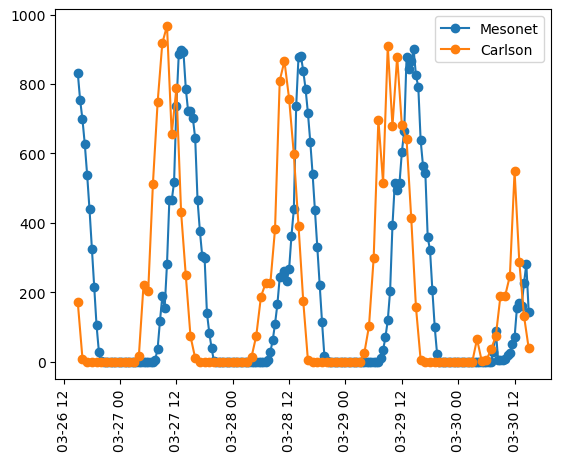

In [7]:
plt.plot(x1.date, x1.SRAD, label="Mesonet", linestyle='-', marker='o')
plt.plot(x2.date, x2["k.down"], label="Carlson", linestyle='-', marker='o')
plt.xticks(rotation=90);
plt.legend()